# Cautions: Animal bite and rabies 
# A talk to non_technical

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
%matplotlib inline  
sns.set_context('talk')
from IPython.display import Image


## Introduction
In the United States, animal bites are often reported to law enforcement (such as animal control). The main concern with an animal bite is that the animal may be rabid. This dataset includes information on over 9,000 animal bites which occurred near Louisville, Kentucky from 1985 to 2017 and includes information on whether the animal was quarantined after the bite occurred and whether that animal was rabid.

In [2]:
Image(url = "https://elite24er.com/wp-content/uploads/2020/11/Protecting-Yourself-From-Animal-Bites-1024x536.jpg")

## Goal of the study
* Which type of animal or breed bite most?
* Which zip code did a bad job in controlling animal bite?
* Which bite causes highest rabies positive rate?


Import data

In [3]:
file = 'archive.zip'
df = pd.read_csv(file, parse_dates = [0,6,10, 12,13])
df['bite_date'] = df['bite_date'].str.replace('5013','2013') 
df['bite_date'] = pd.to_datetime(df['bite_date'], infer_datetime_format=True)
wrong_items = ['2101-02-18','2020-08-08','2201-02-21','2201-02-21','2201-05-01','2021-04-22','1952-05-28','1952-08-05']
corrected = ['2011-02-18','2012-08-08','2015-02-21','2015-02-21','2015-05-01','2012-04-22','2013-05-28','2015-08-05']
df.replace({'bite_date':dict(zip(wrong_items,corrected))}, inplace = True)
idx = df.loc[df['bite_date'].dt.year > 2018].index
df.drop(idx, inplace = True)
df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20,40229,NO,BODY,1985-05-05,UNKNOWN,NaT,NaT,UNKNOWN
1,1986-02-12,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaT,40218,NO,BODY,1986-02-12,UNKNOWN,NaT,NaT,UNKNOWN
2,1987-05-07,DOG,NaN,UNKNOWN,NaN,NaN,NaT,40219,NO,BODY,1990-05-07,UNKNOWN,NaT,NaT,UNKNOWN
3,1988-10-02,DOG,NaN,MALE,BLA & BRO,NaN,NaT,NaN,NO,BODY,1990-10-02,UNKNOWN,NaT,NaT,UNKNOWN
4,1989-08-29,DOG,NaN,FEMALE,BLK-WHT,NaN,NaT,NaN,NO,BODY,NaT,UNKNOWN,NaT,NaT,UNKNOWN


Check data out of time bound from 1985 to 2017.
`bite_data` is cleaned

In [4]:
idx = df.loc[(df['bite_date'].dt.year < 1985) & (df['bite_date'].dt.year > 2017)].index
idx_bf = idx - 1
idx_aft = idx + 1
idx = idx.union(idx_bf).union(idx_aft)
print(df.iloc[idx])


Empty DataFrame
Columns: [bite_date, SpeciesIDDesc, BreedIDDesc, GenderIDDesc, color, vaccination_yrs, vaccination_date, victim_zip, AdvIssuedYNDesc, WhereBittenIDDesc, quarantine_date, DispositionIDDesc, head_sent_date, release_date, ResultsIDDesc]
Index: []


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9002 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   bite_date          8685 non-null   datetime64[ns]
 1   SpeciesIDDesc      8884 non-null   object        
 2   BreedIDDesc        3759 non-null   object        
 3   GenderIDDesc       6476 non-null   object        
 4   color              6425 non-null   object        
 5   vaccination_yrs    3738 non-null   float64       
 6   vaccination_date   4115 non-null   datetime64[ns]
 7   victim_zip         7165 non-null   object        
 8   AdvIssuedYNDesc    2565 non-null   object        
 9   WhereBittenIDDesc  8386 non-null   object        
 10  quarantine_date    2020 non-null   datetime64[ns]
 11  DispositionIDDesc  1535 non-null   object        
 12  head_sent_date     395 non-null    datetime64[ns]
 13  release_date       1445 non-null   datetime64[ns]
 14  ResultsI

In [6]:
df.nunique()

bite_date            2694
SpeciesIDDesc           9
BreedIDDesc           101
GenderIDDesc            3
color                 712
vaccination_yrs         4
vaccination_date     2107
victim_zip            233
AdvIssuedYNDesc         2
WhereBittenIDDesc       3
quarantine_date       602
DispositionIDDesc       4
head_sent_date        325
release_date          582
ResultsIDDesc           3
dtype: int64

## Zip codes have the most victims

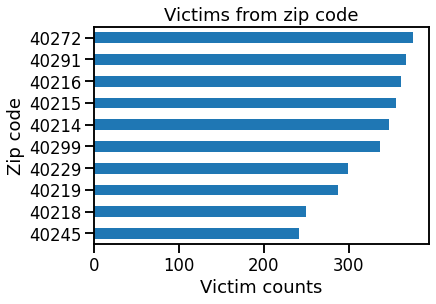

In [7]:
df['victim_zip'].value_counts(ascending = True).tail(10).plot(kind = 'barh')
plt.ylabel('Zip code')
plt.xlabel('Victim counts')
plt.title('Victims from zip code');

## Zip code have the most bites have the highest probability of unvaccined animal bite

C:\anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


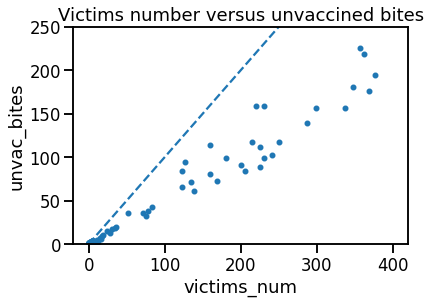

In [8]:
unknown_vac_zip_df = pd.DataFrame(df[df['vaccination_yrs'].isna() & df['vaccination_date'].isna()].dropna(axis = 1, how = 'all')['victim_zip'].value_counts())
unknown_vac_zip_df.rename(columns = {'victim_zip':'unvac_bites'}, inplace = True)
unknown_vac_zip_df
victim_zip_df = pd.DataFrame(df['victim_zip'].value_counts())
victim_zip_df.rename(columns = {'victim_zip':'victims_num'}, inplace = True)
temp = victim_zip_df.merge(unknown_vac_zip_df, how = 'left', left_index = True, right_index = True)
temp.plot(x = 'victims_num', y = 'unvac_bites',kind = 'scatter')
plt.plot([0,400],[0,400],'--')
plt.ylim((0,250))
plt.title('Victims number versus unvaccined bites');

## Animal's gender more likely to bite

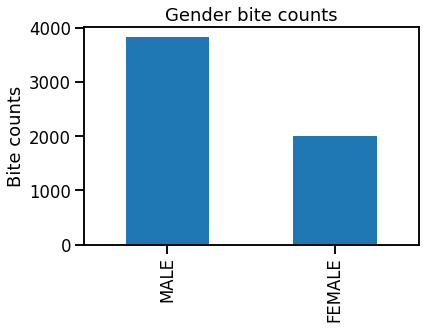

In [9]:
df.replace({'GenderIDDesc':'UNKNOWN'},np.nan, inplace = True)
df['GenderIDDesc'].value_counts().plot(kind = 'bar')
plt.ylabel('Bite counts')
plt.title('Gender bite counts');
# df['GenderIDDesc'].replace('UNKNOWN',np.nan, inplace = True)

## Animals most likely to bite

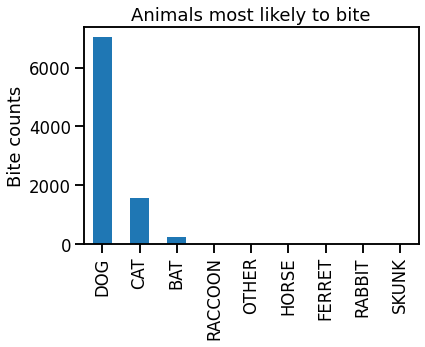

In [10]:
df['SpeciesIDDesc'].value_counts().plot(kind = 'bar')
plt.ylabel('Bite counts')
plt.title('Animals most likely to bite');

In [11]:
Species_df = pd.DataFrame(df['SpeciesIDDesc'].value_counts()).rename(columns = {'SpeciesIDDesc': 'TotalNumber'})
Species_df

,TotalNumber
DOG,7029
CAT,1567
BAT,237
RACCOON,27
OTHER,11
HORSE,5
FERRET,4
RABBIT,3
SKUNK,1


### Is `BreedIDDesc` only for `DOG`?

No, 3 cases for `CAT`

In [12]:
print(df.loc[~df['BreedIDDesc'].isna(),'SpeciesIDDesc'].value_counts())
print(df.loc[ (df['SpeciesIDDesc']== 'CAT') & (~df['BreedIDDesc'].isna()),'BreedIDDesc'])

DOG    3755
CAT       3
Name: SpeciesIDDesc, dtype: int64
6840     OTHER
6872     OTHER
8557    BEAGLE
Name: BreedIDDesc, dtype: object


## Dog breeds most likely to bite

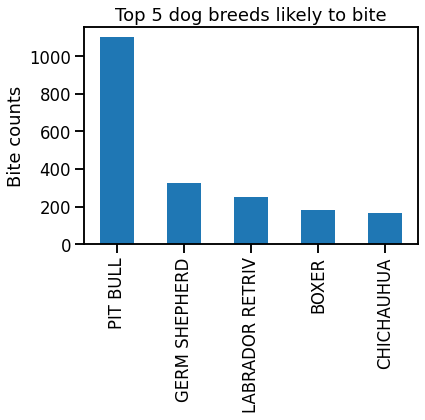

In [13]:
df.loc[df['SpeciesIDDesc'] == 'DOG','BreedIDDesc'].value_counts().head(5).plot(kind = 'bar')
plt.ylabel('Bite counts')
plt.title('Top 5 dog breeds likely to bite');

In [14]:
df['WhereBittenIDDesc'].replace('UNKNOWN',np.nan, inplace = True)
df['WhereBittenIDDesc'].value_counts()


BODY    6213
HEAD    1243
Name: WhereBittenIDDesc, dtype: int64

In [17]:
df['ResultsIDDesc'].replace('UNKNOWN',np.nan, inplace = True)
print(df['ResultsIDDesc'].value_counts())

NEGATIVE    299
POSITIVE      4
Name: ResultsIDDesc, dtype: int64


## RABID POSITIVE

In [18]:
df[df['ResultsIDDesc'] == 'POSITIVE'].dropna(axis = 1)

,SpeciesIDDesc,victim_zip,head_sent_date,ResultsIDDesc
1418,BAT,40203,2015-05-05,POSITIVE
1502,DOG,40210,2017-05-01,POSITIVE
1677,BAT,40207,2016-07-10,POSITIVE
1678,BAT,40214,2016-07-29,POSITIVE


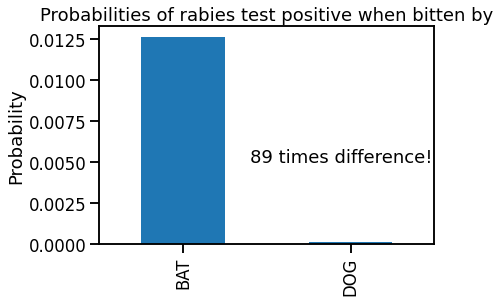

In [19]:
rabies_pos_df = pd.DataFrame(df.loc[df['ResultsIDDesc'] == 'POSITIVE','SpeciesIDDesc'].value_counts())
rabies_pos_df = rabies_pos_df.merge(Species_df, how = 'left',left_index = True, right_index = True)
rabies_pos_df['Prob_rabies_postive'] = rabies_pos_df['SpeciesIDDesc'] / rabies_pos_df['TotalNumber']
rabies_pos_df['Prob_rabies_postive'].plot(kind = 'bar')
chance = round(rabies_pos_df.loc['BAT','Prob_rabies_postive']/ rabies_pos_df.loc['DOG','Prob_rabies_postive'])
plt.ylabel('Probability' )
plt.text( 0.4,0.005, str(chance) +  ' times difference!')
plt.title('Probabilities of rabies test positive when bitten by');

In [20]:
Image(url = "https://scontent-hou1-1.xx.fbcdn.net/v/t1.6435-9/82765238_10157928681875135_1057307797361786880_n.jpg?stp=dst-jpg_s960x960&_nc_cat=104&ccb=1-7&_nc_sid=9267fe&_nc_ohc=mXwy7I9NeB8AX9PIzcq&_nc_ht=scontent-hou1-1.xx&oh=00_AT9ZQfEoxaPTQ3qO1gKX2Y6DVlKOurjXgtJDsU3fhniQsQ&oe=634C3B11")

## Animal attached head

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


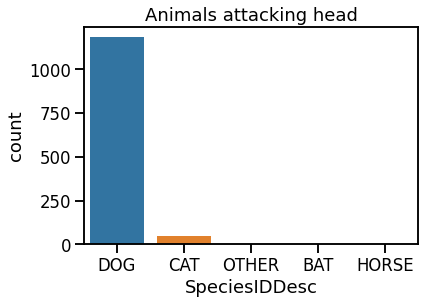

In [21]:
sns.countplot(df.loc[df['WhereBittenIDDesc']=='HEAD','SpeciesIDDesc'])
plt.title('Animals attacking head');

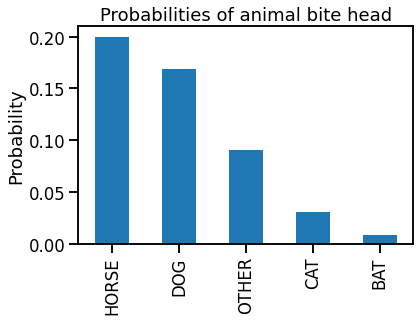

In [24]:
AttackHead_df = pd.DataFrame(df.loc[df['WhereBittenIDDesc']=='HEAD','SpeciesIDDesc'].value_counts()).rename(columns = {'SpeciesIDDesc':'BiteHeadCount'})
AttackHead_df = AttackHead_df.merge(Species_df, how = 'left',left_index = True, right_index = True)
AttackHead_df['Prob_attack_head'] = AttackHead_df['BiteHeadCount'] / AttackHead_df['TotalNumber']
AttackHead_df['Prob_attack_head'].sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Probability')
plt.title('Probabilities of animal bite head');

Tendency of biting head is correlated to animal's height

# Summary

* There are zip code with high probabilites of being bitten. Why? Environment? or wildlife?
* DOG bite occurs most, and Pit bull is the species bite most
* Get a test ASAP to stop rabies when bitten by a bat. 90 times higher chance to test positive
* The probability of attacking head is correlated to animal's size or height.